In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [22]:
# Load the dataset
file_path = 'datasets/dataset_2.csv'
data = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
# Drop non-numeric and irrelevant columns
data = data.drop(columns=['date', 'device'], errors='ignore')

# Define features (X) and target (y)
X = data.drop(columns=['failure'])  # 'failure' is the target variable
y = data['failure']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Standardize the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Function to train and evaluate a model
results = {}
def train_and_evaluate_model(model, model_name):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    # Calculate metrics
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

    print(f"{model_name} Accuracy: {results[model_name]['accuracy']}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {model_name}:\n", report)
    print("-" * 80)

In [24]:
def plot_model_performance(results):
    """
    Create a comprehensive bar plot to visualize model performance metrics.
    
    Parameters:
    - results: Dictionary of performance metrics for each model
    """
    plt.figure(figsize=(12, 6))
    
    # Prepare data for plotting
    models = list(results.keys())
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    
    # Set up bar positions
    x = np.arange(len(models))
    width = 0.2
    
    # Plot each metric
    for i, metric in enumerate(metrics):
        metric_values = [results[model][metric] for model in models]
        plt.bar(x + i*width, metric_values, width, label=metric.capitalize())
    
    # Customize the plot
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title('Model Performance Comparison', fontsize=14)
    plt.xticks(x + width*1.5, models, rotation=45)
    plt.ylim(0, 1)  # Metrics are typically between 0 and 1
    plt.legend(loc='lower right')
    plt.tight_layout()
    
    # Add value labels on top of each bar
    for i, metric in enumerate(metrics):
        metric_values = [results[model][metric] for model in models]
        for j, v in enumerate(metric_values):
            plt.text(j + i*width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)
    
    plt.show()

In [25]:
# Define and evaluate the SVM model
svm_model = SVC(kernel='rbf', random_state=42, class_weight='balanced')
train_and_evaluate_model(svm_model, "SVM")

Training SVM...
SVM Accuracy: 0.9072875633089477
Confusion Matrix:
 [[23844   908]
 [ 3705 21299]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     24752
           1       0.96      0.85      0.90     25004

    accuracy                           0.91     49756
   macro avg       0.91      0.91      0.91     49756
weighted avg       0.91      0.91      0.91     49756

--------------------------------------------------------------------------------


In [26]:
# Define and evaluate the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
train_and_evaluate_model(ann_model, "ANN")

Training ANN...
ANN Accuracy: 0.9696519012782377
Confusion Matrix:
 [[24040   712]
 [  798 24206]]
Classification Report for ANN:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     24752
           1       0.97      0.97      0.97     25004

    accuracy                           0.97     49756
   macro avg       0.97      0.97      0.97     49756
weighted avg       0.97      0.97      0.97     49756

--------------------------------------------------------------------------------


/Users/ivor/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
# Define and evaluate the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
train_and_evaluate_model(rf_model, "Random Forest")

Training Random Forest...
Random Forest Accuracy: 0.9989147037543211
Confusion Matrix:
 [[24708    44]
 [   10 24994]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24752
           1       1.00      1.00      1.00     25004

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756

--------------------------------------------------------------------------------


In [28]:
# Define and evaluate the Naive Bayes model
nb_model = GaussianNB()
train_and_evaluate_model(nb_model, "Naive Bayes")

Training Naive Bayes...
Naive Bayes Accuracy: 0.7108690409196881
Confusion Matrix:
 [[24479   273]
 [14113 10891]]
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.63      0.99      0.77     24752
           1       0.98      0.44      0.60     25004

    accuracy                           0.71     49756
   macro avg       0.80      0.71      0.69     49756
weighted avg       0.81      0.71      0.69     49756

--------------------------------------------------------------------------------


In [29]:
# Define and evaluate the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, "KNN")

Training KNN...
KNN Accuracy: 0.9920411608650213
Confusion Matrix:
 [[24391   361]
 [   35 24969]]
Classification Report for KNN:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     24752
           1       0.99      1.00      0.99     25004

    accuracy                           0.99     49756
   macro avg       0.99      0.99      0.99     49756
weighted avg       0.99      0.99      0.99     49756

--------------------------------------------------------------------------------


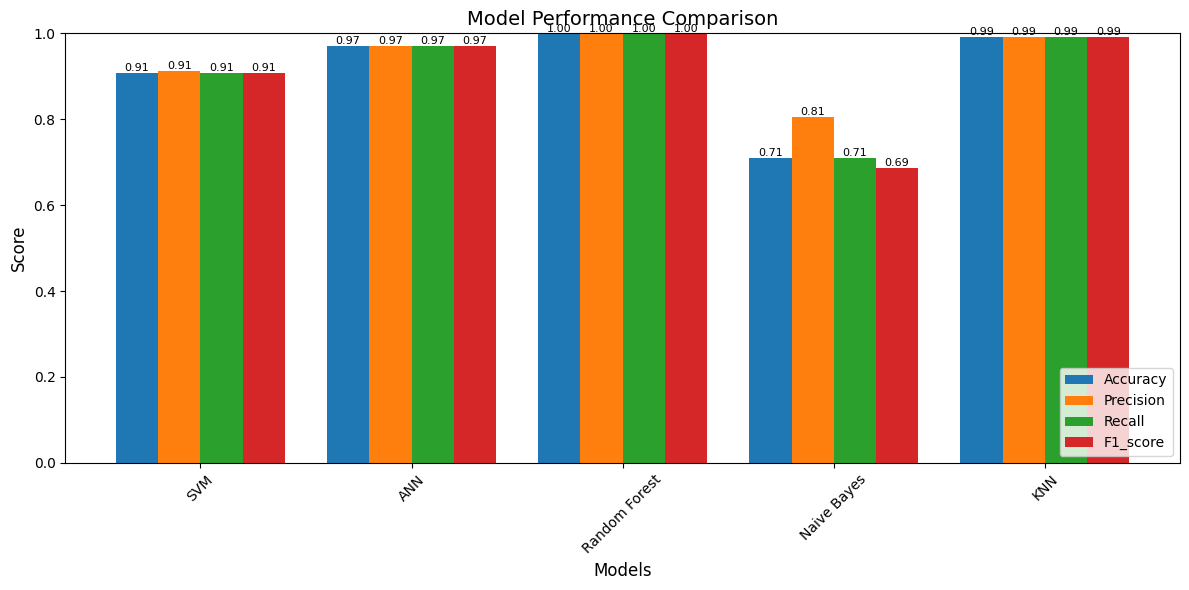

In [30]:
plot_model_performance(results)